<a href="https://colab.research.google.com/github/kevindavisross/stat305-f20/blob/master/HW02_sol.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Stat 305 HW2, Part II

**TYPE YOUR NAME(S) HERE.** I encourage you to work with a partner; submit one per team.

## Introduction

This Colab/Jupyter notebook provides a template for you to fill in. **Read the notebook from start to finish, completing the parts as indicated.**  To run a cell, make sure the cell is highlighted by clicking on it, then press SHIFT + ENTER on your keyboard.  (Alternatively, you can click the "play" button.)

Some code has already been provided.  Be sure to run this code and view the output to understand what it does.  In other parts, you will need to provide the code yourself; use the examples in the textbook as a guide. 

You will use the Python package [Symbulate](https://github.com/dlsun/symbulate).  A few specific links to the documentation are provided below.  **You should use only use Symbulate commands, not general Python code.**

Be sure to run the following lines first.

In [ ]:
!pip install symbulate

In [ ]:
from symbulate import *
%matplotlib inline

## A few notes about Colab/Jupyter notebooks

- Each cell contains either Code or text (Markdown)
- You can run an individual cell by clicking on it and holding SHIFT-ENTER or by clicking the play button.  Any output from the cell will be displayed underneath it.
- Cells are evaluated in the order in which you run them.  After a cell is run it should have `Out[xx]` to the left, indicating the order in which the cells were run.
- When you select "Run all", cells will be evaluated in sequence starting with the first cell at the top of the notebook.
- You can use objects evaluted in one cell in others.  Just keep in mind that cells are evaluated in order.  So if you call something `x` in one cell, but redefine `x` as something else in another cell, it's essential that you evaluate the cells in the proper order.
- Any plots should be displayed automatically (as long as you run the `%matplotlib inline` command).
- While all the code in a cell is evaluated, only the output of the last line of code in a cell is displayed automatically (aside from plots).  If you want to display multiple pieces of output, you can either use `print` or just add cells and put each line in a separate cell. 
- You can add cells with Insert or with the + sign on the menu,


## 1. Collector problem

Each box of a certain type of cereal contains one of $n$ distinct prizes and you want to obtain a complete set. Suppose that each box of cereal is equally likely to contain any one of the $n$ prizes, and the particular prize
that appears in one box has no bearing on the prize that appears in another box. You purchase
cereal boxes one box at a time until you have the complete set of $n$ prizes. 

Let $X$ be the total number of boxes needed to be purchased to obtain a complete set of the $n$ prizes.

We will assume $n=10$.  But you can easily change this parameter to see how various quantities change.  Note: since Python uses zero-based indexing, we will label the 10 prizes 0, 1, ..., 9; `prizes` below is just a list of the prize labels.

In [ ]:
n = 10
prizes = list(range(n))
prizes

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

Before proceeding, make some guesses for how you would expect $X$ to behave.  What is the smallest possible value?  The largest?  What values would be more/less likely?  (Nothing to write up, it's just always a good idea to think about things before plugging away.)

The probability space could be represented as the sequence of prizes obtained.  (In the first box I got prize 3, in the second box I got prize 1, in the third box I got prize 3 (again), etc.)  While technically you would stop buying prizes when you get a complete set, it is convenient to imagine that you keep buying boxes forever.  This way, all outcomes in the probability space would have the same "length".  Also, you could use such a probability space to investigate other problems too (e.g., the number of boxes purchased until $r$ complete sets are obtained, for any $r$ instead of just $r=1$).

Define a probability space `P` in which an outcome corresponds to an infinite sequence of prizes.  (Hint: use [`BoxModel`](https://dlsun.github.io/symbulate/probspace.html#boxmodel) with`prizes` as the tickets and `size=inf`.  Remember `replace=True` is the default.)

In [ ]:
# Enter your Symbulate code here.

In [ ]:
P = BoxModel(prizes, size = inf)

Simulate a few outcomes from `P`.

In [ ]:
# Enter your Symbulate code here.

In [ ]:
P.sim(10)

0,"(2, 0, 4, 6, 1, 8, ...)"
1,"(5, 7, 2, 9, 2, 3, ...)"
2,"(7, 5, 6, 2, 8, 9, ...)"
3,"(7, 3, 0, 8, 8, 5, ...)"
4,"(6, 9, 4, 4, 6, 6, ...)"
5,"(0, 4, 9, 1, 0, 2, ...)"
6,"(5, 7, 0, 9, 1, 8, ...)"
7,"(5, 2, 7, 4, 2, 4, ...)"
8,"(8, 8, 2, 2, 3, 5, ...)"
...,...
9,"(7, 2, 2, 0, 7, 4, ...)"


Remember that a random variable is a function defined on the probability space.  We have seen how simple built-in functions like `sum` and `max` were used to define `RV`s.  But it is also possible to program your own functions to use in defining Symbulate random variables, e.g., `X=RV(P, custom_function)`.  You just need to make sure that the function you write takes as an input an object corresponding to the output of the probability space `P`.

The custom function `number_prizes_until_complete_set`, defined using Python code below, takes as an input a sequence of prizes (each prize labeled with a number 0 through 9) and returns how many boxes needed to be purchased until a complete set was obtained.  For now, you don't need to worry too much about the Python code.  Just know that the function does what it's supposed to do.

In [ ]:
def number_prizes_until_complete_set(outcome):
    prizes_so_far = []
    for trial, result in enumerate(outcome):
        prizes_so_far.append(result)
        if len(set(prizes_so_far)) == n:
            return trial + 1 # +1 is need for zero-indexing; the first prize is 0th prize in Python

# for the outcome below, the set is completed when you get prize 7 on box 19 (with usual non-Python indexing)
outcome = (3, 4, 3, 0, 1, 6, 5, 3, 2, 4, 5, 6, 9, 8, 3, 4, 5, 6, 7, 3, 3, 3)  
number_prizes_until_complete_set(outcome)

19

Use the `number_prizes_until_complete_set` function to define a `RV` `X` on the probability space `P` that you defined above.

In [ ]:
### Enter your Symbulate commands here.

In [ ]:
X = RV(P, number_prizes_until_complete_set)

Find the value of `X` for the following outcome; it should be 19.

In [ ]:
outcome = (3, 4, 3, 0, 1, 6, 5, 3, 2, 4, 5, 6, 9, 8, 3, 4, 5, 6, 7, 3, 3, 3) 
# Enter your Symbulate code here.

In [ ]:
X(outcome)

19

Simulate 10000 values of `X` and store the values in a variable `x`.

In [ ]:
# Enter your Symbulate code here.

In [ ]:
x = X.sim(10000)

Summarize the simulated values of `X` in a table.

In [ ]:
# Enter your Symbulate code here.

In [ ]:
x.tabulate()

10,4
11,13
12,41
13,81
14,131
15,169
16,247
17,285
18,307
19,382
20,463


Summarize the simulated values of `X` in a plot.

In [ ]:
# Enter your Symbulate code here.

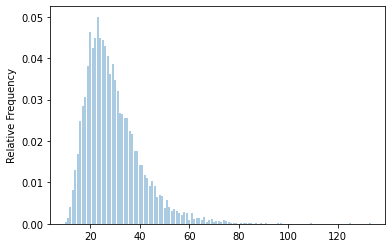

In [ ]:
x.plot()

Use the simulation results to estimate $P(X > 40)$ by finding the corresponding simulated relative frequency.  Enter the appropriate Symbulate commands below; don't just use the above table and a calculator.  (There are a few ways to do this, and you might want to try a couple.  [Hints](https://dlsun.github.io/symbulate/sim.html#recap).)

In [ ]:
# Enter your Symbulate code here.

In [ ]:
x.count_gt(40) / x.count()

0.1384

Compute the average (a.k.a. mean) of the simulated values of `X`. 

In [ ]:
# Enter your Symbulate code here.

In [ ]:
x.mean()

29.2565

Compute the standard deviation (sd) of the simulated values.

In [ ]:
# Enter your Symbulate code here.

In [ ]:
x.sd()

11.146035517169322

Write a few sentences, in the context of the collector problem, describing the behavior of $X$ when $n=10$ 

**TYPE YOUR RESPONSE HERE.**

The distribution is skewed to the right with a mean of about 29 prizes and a SD of about 11 prizes.  Values around 25 or so are most likely.  The smallest possible value of X is 10.  X can take some extremely large values, but the probability that X is above 60 or so is pretty small.

This is all you're required to do for Problem 1.  But I would encourage you to play around with the problem.  What happens as you change $n$?  What other random variables might you be interested in, and how might you simulate/program them?

## 2. Distributions of functions of Bivariate Normal random variables

Let $X$ be the Math score and $Y$ be the Reading score of a randomly selected SAT taker.  We'll assume $(X, Y)$ pairs follow a Bivariate Normal distribution as in [Section 3.9](https://bookdown.org/kevin_davisross/probsim-book/sec-example-sat-both.html) of the textbook.

- Math scores ($X$) have mean 527 and standard deviation 107
- Reading scores ($Y$) have mean 533 and standard deviation 100
- We will investigate different values of correlation.  (We will see correlation in more detail later.  For now, just know that correlation is one way to measure the strength of the association between two random variables.)

We will use simulation to investigate how changing correlation affects the long run average and SD of

- Total score: $T = X + Y$
- Difference in scores: $W = X - Y$
- Larger score: $V = \max(X, Y)$

### a) For each of the following scenarios, simulate many $(X, Y)$ pairs and plot them

   - Scatter plot is the default `plot` for pairs of values.
   - You can also try a two-dimensional histogram using `plot('hist')`; ignore any error messages that pop up.
   - You can also try `plot('density')` which plots a smooth density surface over the pairs of possible values with color intensity representing relative height, but this sometimes take a minute to run.

#### (1) Correlation = 0

In [ ]:
# Enter your Symbulate code here.  Feel free to add cells as needed.

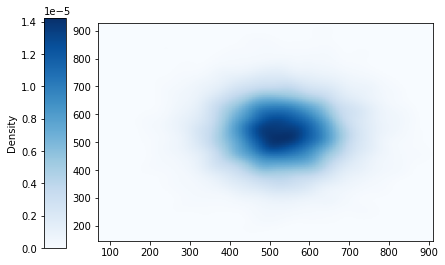

In [ ]:
rho = 0

X, Y = RV(BivariateNormal(mean1 = 527, sd1 = 107, mean2 = 533, sd2 = 100, corr = rho))

(X & Y).sim(10000).plot('density')

#### (2) Correlation = 0.77

In [ ]:
# Enter your Symbulate code here.  Feel free to add cells as needed.

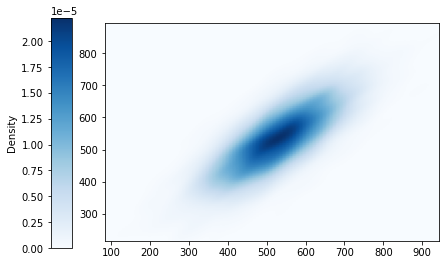

In [ ]:
rho = 0.77

X, Y = RV(BivariateNormal(mean1 = 527, sd1 = 107, mean2 = 533, sd2 = 100, corr = rho))

(X & Y).sim(10000).plot('density')

#### (3) Correlation = 0.40

In [ ]:
# Enter your Symbulate code here.  Feel free to add cells as needed.

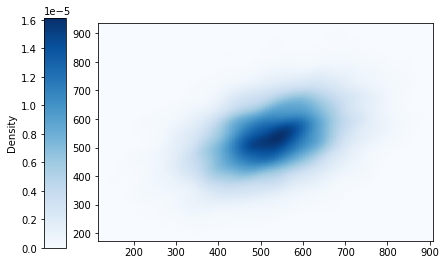

In [ ]:
rho = 0.40

X, Y = RV(BivariateNormal(mean1 = 527, sd1 = 107, mean2 = 533, sd2 = 100, corr = rho))

(X & Y).sim(10000).plot('density')

#### (4) Correlation = -0.77

In [ ]:
# Enter your Symbulate code here.  Feel free to add cells as needed.

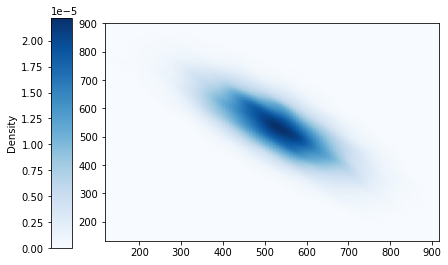

In [ ]:
rho = -0.77

X, Y = RV(BivariateNormal(mean1 = 527, sd1 = 107, mean2 = 533, sd2 = 100, corr = rho))

(X & Y).sim(10000).plot('density')

### a) Total score: $T = X+ Y$

For each of the following scenarios

1. Simulate many values of $T = X+Y$ and plot them
1. Approximate the long run average of $T$.  How does it relate to the sum of the long run averages of $X$ and $Y$? (Greater/less/equal)
1. Approximate the variance of $T$.  How does it relate to the sum of the variances of $X$ and $Y$?  (Greater/less/equal).  (Remember, SD is just the square root of variance.)
1. Approximate the SD of $T$.  How does it relate to the sum of the SDs of $X$ and $Y$?  (Greater/less/equal)

#### (1) Correlation = 0

In [ ]:
# Enter your Symbulate code here.  Feel free to add cells as needed.

(1059.9598339400902, 30221.10786423485, 173.84219241667097)

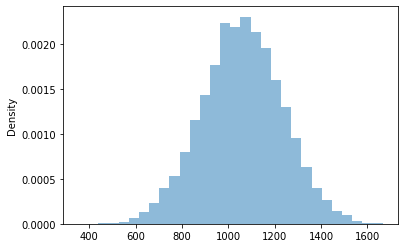

In [ ]:
rho = 0.40

X, Y = RV(BivariateNormal(mean1 = 527, sd1 = 107, mean2 = 533, sd2 = 100, corr = rho))

T = X + Y

t = T.sim(10000)

t.plot()

t.mean(), t.var(), t.sd()

#### (2) Correlation = 0.77

In [ ]:
# Enter your Symbulate code here.  Feel free to add cells as needed.

(1061.1461844707467, 38374.44859737345, 195.89397284595933)

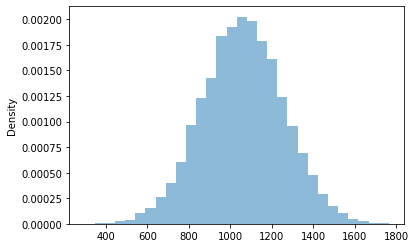

In [ ]:
rho = 0.77

X, Y = RV(BivariateNormal(mean1 = 527, sd1 = 107, mean2 = 533, sd2 = 100, corr = rho))

T = X + Y

t = T.sim(10000)

t.plot()

t.mean(), t.var(), t.sd()

#### (3) Correlation = 0.40

In [ ]:
# Enter your Symbulate code here.  Feel free to add cells as needed.

(1059.2821105821033, 30685.78452727021, 175.17358398819786)

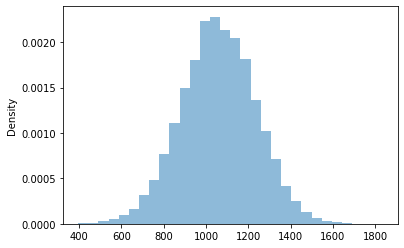

In [ ]:
rho = 0.40

X, Y = RV(BivariateNormal(mean1 = 527, sd1 = 107, mean2 = 533, sd2 = 100, corr = rho))

T = X + Y

t = T.sim(10000)

t.plot()

t.mean(), t.var(), t.sd()

#### (4) Correlation = -0.77

In [ ]:
# Enter your Symbulate code here.  Feel free to add cells as needed.

(1058.8263591497007, 4959.765094473879, 70.42559970972117)

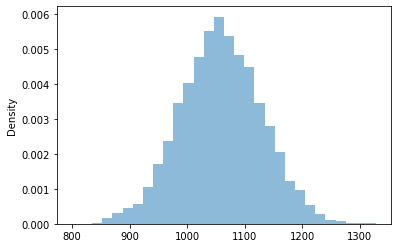

In [ ]:
rho = -0.77

X, Y = RV(BivariateNormal(mean1 = 527, sd1 = 107, mean2 = 533, sd2 = 100, corr = rho))

T = X + Y

t = T.sim(10000)

t.plot()

t.mean(), t.var(), t.sd()

#### (5) Write a few sentences summarizing what you observe.  Describe the general shape of the distribution of $T$. How does correlation affect the long run average and SD of $T = X+ Y$?

**TYPE YOUR RESPONSE HERE**

In each case

- Shape is Normal
- Mean is the sum of the means of X and Y

But the variance and SD change based on the cases

- When correlation is 0, the variance of X + Y is the sum of the variances
- When correlation is positive, the variance of X + Y is greater than the sum of the variances
- When correlation is negative, the variance of X + Y is less than the sum of the variances

### b) Difference in scores: $W = X - Y$

For each of the following scenarios

1. Simulate many values of $W = X-Y$ and plot them
1. Approximate the long run average of $W$.  How does it relate to the sum of the long run averages of $X$ and $Y$? (Greater/less/equal)
1. Approximate the variance of $W$.  How does it relate to the *sum* of the variances of $X$ and $Y$?  (Greater/less/equal).  (Remember, SD is just the square root of variance.)
1. Approximate the SD of $W$.  How does it relate to the *sum* of the SDs of $X$ and $Y$?  (Greater/less/equal)

#### (1) Correlation = 0

In [ ]:
# Enter your Symbulate code here.  Feel free to add cells as needed.

(-6.42852621671491, 21066.989964779114, 145.1447207609671)

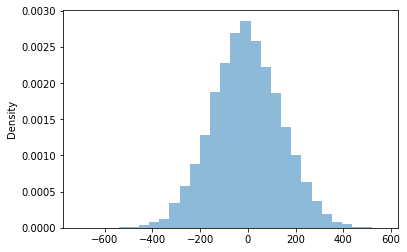

In [ ]:
rho = 0

X, Y = RV(BivariateNormal(mean1 = 527, sd1 = 107, mean2 = 533, sd2 = 100, corr = rho))

W = X - Y

w = W.sim(10000)

w.plot()

w.mean(), w.var(), w.sd()

#### (2) Correlation = 0.77

In [ ]:
# Enter your Symbulate code here.  Feel free to add cells as needed.

(-7.760707438872999, 5006.591569398603, 70.75727220151016)

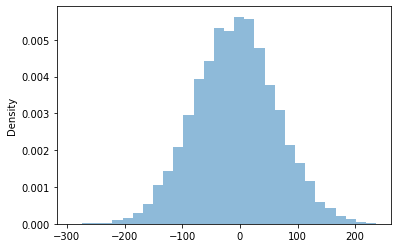

In [ ]:
rho = 0.77

X, Y = RV(BivariateNormal(mean1 = 527, sd1 = 107, mean2 = 533, sd2 = 100, corr = rho))

W = X - Y

w = W.sim(10000)

w.plot()

w.mean(), w.var(), w.sd()

#### (3) Correlation = 0.40

In [ ]:
# Enter your Symbulate code here.  Feel free to add cells as needed.

(-5.5195314720541075, 13165.500854117448, 114.74101644188728)

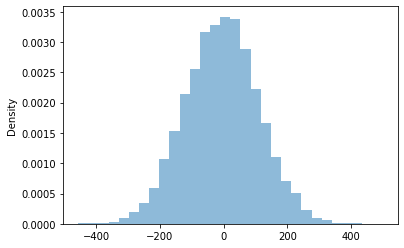

In [ ]:
rho = 0.40

X, Y = RV(BivariateNormal(mean1 = 527, sd1 = 107, mean2 = 533, sd2 = 100, corr = rho))

W = X - Y

w = W.sim(10000)

w.plot()

w.mean(), w.var(), w.sd()

#### (4) Correlation = -0.77

In [ ]:
# Enter your Symbulate code here.  Feel free to add cells as needed.

(-7.6847519043299926, 38288.953280593756, 195.67563282277575)

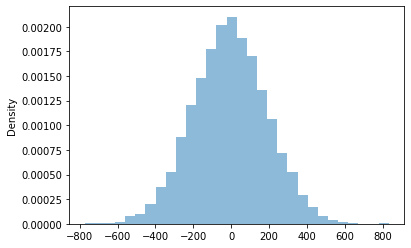

In [ ]:
rho = -0.77

X, Y = RV(BivariateNormal(mean1 = 527, sd1 = 107, mean2 = 533, sd2 = 100, corr = rho))

W = X - Y

w = W.sim(10000)

w.plot()

w.mean(), w.var(), w.sd()

#### (5) Write a few sentences summarizing what you observe.  Describe the general shape of the distribution of $T$.  How does correlation affect the long run average and SD of $W = X - Y$?

**TYPE YOUR RESPONSE HERE**

In each case

- Shape is Normal
- Mean is the difference of the means of X and Y

But the variance and SD change based on the cases

- When correlation is 0, the variance of X - Y is the *sum* of the variances
- When correlation is positive, the variance of X - Y is less than the *sum* of the variances
- When correlation is negative, the variance of X - Y is greater than the *sum* of the variances

### c) Larger score: $V = \max(X, Y)$

For each of the following scenarios

1. Simulate many values of $V = \max(X, Y)$ and plot them
1. Approximate the long run average of $V$.  How does it relate to the long run averages of $X$ and $Y$? (Just comment generally)
1. Approximate the variance of $V$.  How does it relate to the variances of $X$ and $Y$?  (Just comment generally)
1. Approximate the SD of $V$.  How does it relate to  the SDs of $X$ and $Y$?  (Just comment generally)

#### (1) Correlation = 0

In [ ]:
# Enter your Symbulate code here.  Feel free to add cells as needed.

(588.1081559535021, 7385.909634789069, 85.94131506318175)

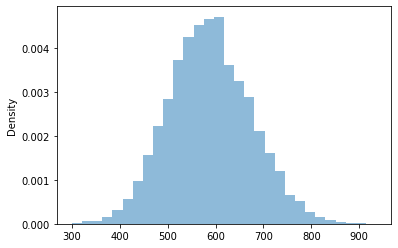

In [ ]:
rho = 0

X, Y = RV(BivariateNormal(mean1 = 527, sd1 = 107, mean2 = 533, sd2 = 100, corr = rho))

V = (X & Y).apply(max)

v = V.sim(10000)

v.plot()

v.mean(), v.var(), v.sd()

#### (2) Correlation = 0.77

In [ ]:
# Enter your Symbulate code here.  Feel free to add cells as needed.

(558.0414309436907, 9787.843426257483, 98.93353034364782)

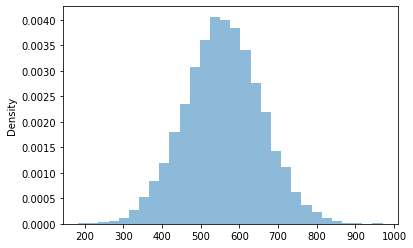

In [ ]:
rho = 0.77

X, Y = RV(BivariateNormal(mean1 = 527, sd1 = 107, mean2 = 533, sd2 = 100, corr = rho))

V = (X & Y).apply(max)

v = V.sim(10000)

v.plot()

v.mean(), v.var(), v.sd()

#### (3) Correlation = 0.40

In [ ]:
# Enter your Symbulate code here.  Feel free to add cells as needed.

(575.9762543632605, 8836.93494123702, 94.00497296014196)

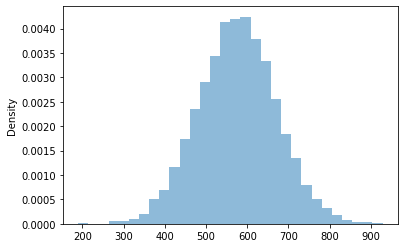

In [ ]:
rho = 0.40

X, Y = RV(BivariateNormal(mean1 = 527, sd1 = 107, mean2 = 533, sd2 = 100, corr = rho))

V = (X & Y).apply(max)

v = V.sim(10000)

v.plot()

v.mean(), v.var(), v.sd()

#### (4) Correlation = -0.77

In [ ]:
# Enter your Symbulate code here.  Feel free to add cells as needed.

(608.3479108219569, 4625.999687738633, 68.01470199698468)

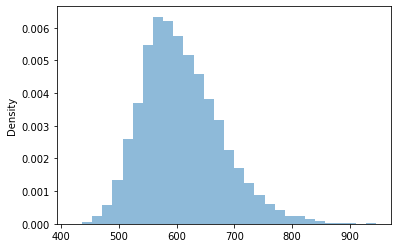

In [ ]:
rho = -0.77

X, Y = RV(BivariateNormal(mean1 = 527, sd1 = 107, mean2 = 533, sd2 = 100, corr = rho))

V = (X & Y).apply(max)

v = V.sim(10000)

v.plot()

v.mean(), v.var(), v.sd()

#### (5) Write a few sentences summarizing what you observe.  Describe the general shape of the distribution of $T$.  How does correlation affect the long run average and SD of $V = \max(X, Y)$?

The patterns are less obvious here.  In some of the cases, it looks like the shape is relatively Normal, but not for a correlation of -0.77.  Also note that the mean of the max is  greater than the max of the two means, and the mean of the max increases as the correlation moves from 1 to -1.  But the variance decreases as the correlation moves from 1 to -1.


## Submission Instructions

- After you have completed the notebook, select **Runtime > Run all**
- After the notebook finishes rerunning check to make sure that you have no errors and everything runs properly.  Fix any problems and redo this step until it works.
    - Careful: there is a bug and sometimes 2-d histograms throw errors.  The plot works fine, it just triggers an error for some reason.  Unfortunately, that might stop your notebook from running.  So if you use 2-d histograms, pay special attention to this step.
- Make sure you typed the names of any partners at the top of the notebook where it says "Type your names here".
- Click Share in the top right and share with stat305cp@gmail.com 
- Save a PDF version: File > Print > Save as PDF
- Download the notebook: File > Download .ipynb
- Submit the notebook and PDF in Canvas.  Remember, only one submission per team.  (Either partner can submit; put the names of the partners in the comments.)